# Problema de Classificação - UCI - Absenteeism_at_work

Esse notebook está usando uma base de dados aberta obtida em https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work.

Originalmente, como será observado, este dataset é para problemas de regressão, porém, criei uma reposta/target/variável dependente para este exercício.

In [1]:
# Instruções basiconas de sempre.

# Lidar com dataframes.
import numpy as np
import pandas as pd

# Lidar com gráficos.
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from plotting import (multiple_histograms_plot,
                      bar_plot_with_categorical,
                      plot_confusion_matrix,
                      plot_confusion_matrix_2,
                      plot_roc)

# Lidar com preparação de dados.
from data_prep import data_prep as dp # Eu que fiz esse modulinho ("uuuuuuuuuma bosts!").
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (StandardScaler
                                   , MinMaxScaler)
from sklearn.model_selection import (train_test_split
                                     , cross_val_score
                                     , StratifiedKFold)

# Lidar com validação de modelos.
from sklearn.metrics import (confusion_matrix
                             , accuracy_score
                             , classification_report)

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
nomeDaBase = "../bases/Absenteeism_at_work.csv"
df = pd.read_csv(nomeDaBase, sep=";", encoding="utf-8")

df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


## Cardinalidade
Varificando a cardinalidade dos atributos inteiros. No dataset passado, as variáveis categóricas devem ter passado por um processo de Label Encoder e, portanto, estão como números inteiros. Abaixo, veremos a cardinalidade de cada atributo e analisaremos para ver como tratar cada caso.

In [5]:
df = df.select_dtypes(exclude=["float64"])

matriz_cardialidade = []

for i, coluna in df.items():
    matriz_cardialidade.append([i, len(df[i].unique()), df[i].unique()])
            
matriz_cardialidade = pd.DataFrame(matriz_cardialidade, columns=["Atributo", "Cardinalidade", "Valores"])
matriz_cardialidade.sort_values(by="Cardinalidade", inplace=True, ascending=True)
    
matriz_cardialidade

,Atributo,Cardinalidade,Valores
14,Social smoker,2,"[0, 1]"
13,Social drinker,2,"[1, 0]"
10,Disciplinary failure,2,"[0, 1]"
4,Seasons,4,"[1, 4, 2, 3]"
11,Education,4,"[1, 3, 2, 4]"
3,Day of the week,5,"[3, 4, 5, 6, 2]"
12,Son,5,"[2, 1, 0, 4, 3]"
15,Pet,6,"[1, 0, 4, 2, 5, 8]"
9,Hit target,13,"[97, 92, 93, 95, 99, 96, 94, 98, 81, 88, 100, 87, 91]"
2,Month of absence,13,"[7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 0]"


## Análise preliminar da base e ações:
1. **Existência de campo de identificação:** Remover campos que identifiquem a pessoa, pois queremos um modelo capaz de generalizar.
2. **Incongruências no fator/atribuo/variável independente "Month of absence":** Existem 3 registros "0", o que não é possível.

### Arrumando base:
1. **Existência de campo de identificação:** Remover campos que identifiquem a pessoa, pois queremos um modelo capaz de generalizar.

In [6]:
df_temporario = df.drop(["ID"], axis=1).copy()

2. **Incongruências no fator/atribuo/variável independente "Month of absence":** Existem 3 registros "0", o que não é possível.

In [7]:
seasons_list = sorted(df_temporario["Seasons"].unique())

for season in seasons_list:
    if 0 in (df_temporario[df_temporario["Seasons"] == season]["Month of absence"].unique()):
        print(f"""Estação: {season}""")
        print(f"""{df_temporario[df_temporario["Seasons"] == season]["Month of absence"].value_counts()}""")
        print("-"*50)

Estação: 1
7    67
8    54
9    32
6    16
0    1 
Name: Month of absence, dtype: int64
--------------------------------------------------
Estação: 2
2     72
3     60
1     50
12    9 
0     1 
Name: Month of absence, dtype: int64
--------------------------------------------------
Estação: 3
5    64
4    53
6    38
3    27
0    1 
Name: Month of absence, dtype: int64
--------------------------------------------------


Como tratam-se de poucos registros, vou substituir o 0 de cada "Month of absence" pela categoria de maior frequência dentro de cada estação.

In [8]:
df_temporario.loc[(df_temporario["Seasons"] == 1) & (df_temporario["Month of absence"] == 0), ["Month of absence"]] = df_temporario.loc[df_temporario["Seasons"] == 1, ["Month of absence"]].mode()
df_temporario.loc[(df_temporario["Seasons"] == 2) & (df_temporario["Month of absence"] == 0), ["Month of absence"]] = df_temporario.loc[df_temporario["Seasons"] == 2, ["Month of absence"]].mode()
df_temporario.loc[(df_temporario["Seasons"] == 3) & (df_temporario["Month of absence"] == 0), ["Month of absence"]] = df_temporario.loc[df_temporario["Seasons"] == 3, ["Month of absence"]].mode()

# Criação de novo target
No problema original, a variável resposta/variável dependente/target é "Absenteeism time in hours". Porém, vou propor uma divisão em 3 classes:
1. Menos de 1 dia
2. 1 dia
3. Mais de 1 dia

Com o histograma abaixo, é possível observar que 8h, ou um dia útil é a moda do nosso atributo "Absenteeism time in hours". E, para mim, é importante saber se uma pessoa ficará afastada menos de um dia, um dia e mais de um dia.

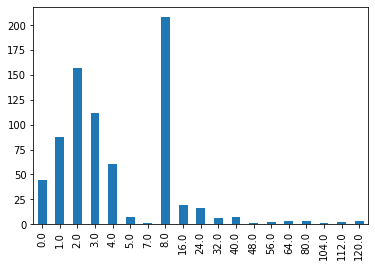

In [15]:
df_temporario["Absenteeism time in hours"].value_counts().sort_index().plot(kind="bar")

In [20]:
df_temporario["Absenteeism"] = np.where(df_temporario["Absenteeism time in hours"] < 8, 0,
                                       (np.where(df_temporario["Absenteeism time in hours"] == 8, 1, 2)))

df_temporario.drop("Absenteeism time in hours", axis=1, inplace=True)

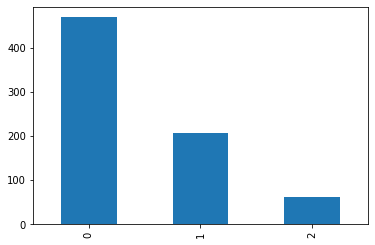

In [35]:
ax = df_temporario["Absenteeism"].value_counts().sort_index().plot.bar()

# Feature selection:
Vou usar três técnicas para verificar o impacto dos atributos categóricos sobre a resposta:
1. Fischer score;
2. ROC-AUC para uma variável; e
3. Boruta.

Dividindo o dataset em treino e teste:

In [36]:
x = df_temporario.drop("Absenteeism", axis=1)
y = df_temporario.Absenteeism

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## 1. Fischer score

In [37]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import (SelectKBest
                                       , SelectPercentile)

In [38]:
f_score = chi2(x_train.fillna(0), y_train)

pvalues = pd.Series(f_score[1])
pvalues.index = x_train.columns
pvalues.sort_values(ascending=True)

Transportation expense             9.799084e-61
Reason for absence                 5.979396e-38
Disciplinary failure               5.088622e-04
Pet                                6.728721e-04
Son                                7.606347e-03
Day of the week                    4.619153e-02
Distance from Residence to Work    9.605390e-02
Social drinker                     1.302875e-01
Social smoker                      1.780061e-01
Service time                       3.267145e-01
Seasons                            4.218695e-01
Height                             5.024218e-01
Weight                             5.478802e-01
Month of absence                   5.997971e-01
Body mass index                    6.372772e-01
Age                                8.990823e-01
Education                          9.068147e-01
Hit target                         9.982124e-01
dtype: float64

In [49]:
atributos_fisher = list(pvalues[pvalues<1e-02].index)

x_train_filtrado = x_train[atributos_fisher]
x_test_filtrado = x_test[atributos_fisher]

**Conclusão do uso do Fisher score:** A lista acima indica, de cima para baixo, os fatores com maior importância para a resposta. Eu escolherei trabalhar com as 4 primeiras. 

# Aplicação dos modelos:

Vou testar alguns modelos separadamente e na seguinte ordem:

1. Árvore de decisão
2. Random forest
3. Logistic regression
4. Naive Bayes
5. SVM e Kernel SVM

# 1. Árvore de decisão
Comecei por esse pois é o modelo mais robusto a um dataprep mal feito.

In [50]:
from sklearn.tree import (DecisionTreeClassifier
                          , export)

# classificador = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=(len(x.columns)**0.5)*2)
classificador = DecisionTreeClassifier(criterion='entropy'
                                       , random_state=0
                                       , max_depth=len(x_train_filtrado.columns))

classificador.fit(x_train_filtrado, y_train)

y_pred = classificador.predict(x_test_filtrado)

Métrica 1 (Acurácia): 0.711712.

Métrica 2 (Relatório de classificação):
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       133
           1       0.60      0.49      0.54        68
           2       0.00      0.00      0.00        21

    accuracy                           0.71       222
   macro avg       0.45      0.48      0.46       222
weighted avg       0.63      0.71      0.66       222


Normalized confusion matrix
[[0.93984962 0.06015038 0.        ]
 [0.51470588 0.48529412 0.        ]
 [0.33333333 0.66666667 0.        ]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


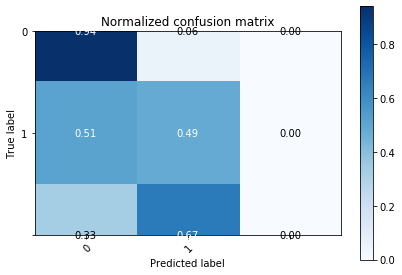

In [51]:
print("Métrica 1 (Acurácia): {:.6}.\n".format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}\n".format(classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);

In [52]:
feature_importance = pd.DataFrame(data=(classificador.feature_importances_).reshape(1,len(x_train_filtrado.columns))
                                  , columns=x_train_filtrado.columns)

feature_importance = feature_importance.T

feature_importance.sort_values(by=0, ascending=False)

,0
Reason for absence,0.812027
Transportation expense,0.091487
Pet,0.065331
Son,0.031155
Disciplinary failure,0.000000


# 2. Random forest
Outro modelo robusto a um dataprep mal feito.

In [53]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators=40
                                       , criterion='entropy'
                                       , random_state=0
                                       , max_depth=len(x_train_filtrado.columns))

classificador.fit(x_train_filtrado, y_train)

y_pred = classificador.predict(x_test_filtrado)

Métrica 1 (Acurácia): 0.689189.

Métrica 2 (Relatório de classificação):
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       133
           1       0.50      0.62      0.55        68
           2       0.00      0.00      0.00        21

    accuracy                           0.69       222
   macro avg       0.43      0.48      0.46       222
weighted avg       0.64      0.69      0.66       222


Normalized confusion matrix
[[0.83458647 0.16541353 0.        ]
 [0.38235294 0.61764706 0.        ]
 [0.04761905 0.95238095 0.        ]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


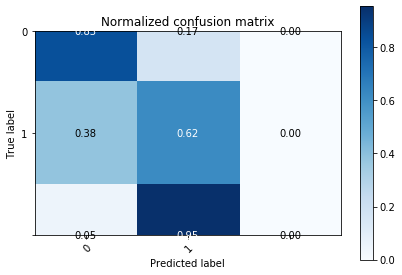

In [54]:
print("Métrica 1 (Acurácia): {:.6}.\n".format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}\n".format(classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);

In [55]:
feature_importance = pd.DataFrame(data=(classificador.feature_importances_).reshape(1,len(x_train_filtrado.columns))
                                  , columns=x_train_filtrado.columns)

feature_importance = feature_importance.T

feature_importance.sort_values(by=0, ascending=False)

,0
Reason for absence,0.624632
Transportation expense,0.158118
Disciplinary failure,0.084205
Pet,0.070245
Son,0.062799


# 3. Logistic regression

In [56]:
from sklearn.linear_model import LogisticRegression

classificador = LogisticRegression(solver="lbfgs"
                                   , max_iter=500)
classificador.fit(x_train_filtrado, y_train)

y_pred = classificador.predict(x_test_filtrado)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Métrica 1 (Acurácia): 0.671171.

Métrica 2 (Relatório de classificação):
              precision    recall  f1-score   support

           0       0.70      0.91      0.79       133
           1       0.57      0.41      0.48        68
           2       0.00      0.00      0.00        21

    accuracy                           0.67       222
   macro avg       0.42      0.44      0.42       222
weighted avg       0.59      0.67      0.62       222


Normalized confusion matrix
[[0.90977444 0.09022556 0.        ]
 [0.58823529 0.41176471 0.        ]
 [0.57142857 0.42857143 0.        ]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


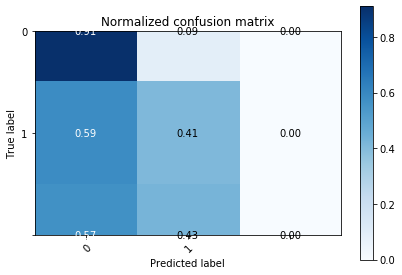

In [57]:
print("Métrica 1 (Acurácia): {:.6}.\n".format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}\n".format(classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);

# 4. Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB

classificador = GaussianNB()
classificador.fit(x_train_filtrado, y_train)

y_pred = classificador.predict(x_test_filtrado)

Métrica 1 (Acurácia): 0.337838.

Métrica 2 (Relatório de classificação):
              precision    recall  f1-score   support

           0       1.00      0.09      0.17       133
           1       0.32      0.88      0.47        68
           2       0.14      0.14      0.14        21

    accuracy                           0.34       222
   macro avg       0.49      0.37      0.26       222
weighted avg       0.71      0.34      0.26       222


Normalized confusion matrix
[[0.09022556 0.83458647 0.07518797]
 [0.         0.88235294 0.11764706]
 [0.         0.85714286 0.14285714]]


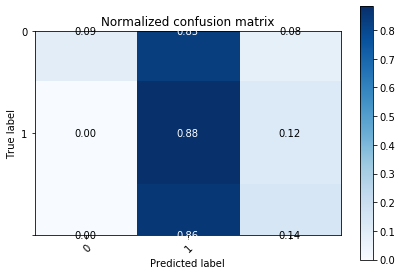

In [59]:
print("Métrica 1 (Acurácia): {:.6}.\n".format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}\n".format(classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);

# 5. SVM

In [60]:
from sklearn.svm import SVC

classificador = SVC(kernel='linear', random_state=0)
classificador.fit(x_train_filtrado, y_train)

y_pred = classificador.predict(x_test_filtrado)

Métrica 1 (Acurácia): 0.635135.

Métrica 2 (Relatório de classificação):
              precision    recall  f1-score   support

           0       0.69      0.86      0.76       133
           1       0.48      0.40      0.44        68
           2       0.00      0.00      0.00        21

    accuracy                           0.64       222
   macro avg       0.39      0.42      0.40       222
weighted avg       0.56      0.64      0.59       222


Normalized confusion matrix
[[0.85714286 0.14285714 0.        ]
 [0.60294118 0.39705882 0.        ]
 [0.52380952 0.47619048 0.        ]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


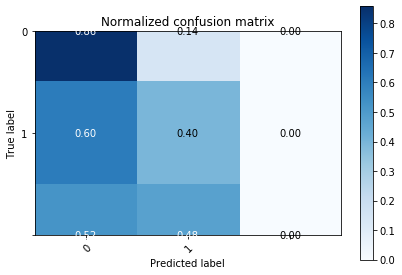

In [61]:
print("Métrica 1 (Acurácia): {:.6}.\n".format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}\n".format(classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);

# 6. Kernel SVM

In [62]:
from sklearn.svm import SVC

classificador = SVC(kernel='rbf', random_state=0, gamma="auto")
classificador.fit(x_train_filtrado, y_train)

y_pred = classificador.predict(x_test_filtrado)

Métrica 1 (Acurácia): 0.653153.

Métrica 2 (Relatório de classificação):
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       133
           1       0.47      0.43      0.45        68
           2       0.22      0.10      0.13        21

    accuracy                           0.65       222
   macro avg       0.48      0.46      0.46       222
weighted avg       0.62      0.65      0.63       222


Normalized confusion matrix
[[0.85714286 0.13533835 0.0075188 ]
 [0.48529412 0.42647059 0.08823529]
 [0.19047619 0.71428571 0.0952381 ]]


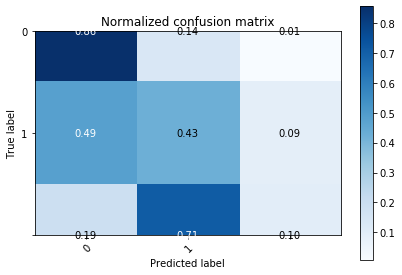

In [63]:
print("Métrica 1 (Acurácia): {:.6}.\n".format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}\n".format(classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);

Sumarizando os resultados e usando a **acurácia como métrica de comparação**, temos:

1. Árvore de decisão: 0,71
2. Random forest: 0,69
3. Logistic regression: 0,67
4. Naive Bayes: 0,34
5. SVM: 0,64
6. Kernel SVM: 0,65

**Conclusão da comparação de modelos:** O modelo obtido usando a técnica Random Forest possui a maior acurácia e, portanto, usaremos esse modelo para o resto do notebook. **IMPORTANTÍSSIMO** salientar que não otimizamos os hiperparâmetros de cada modelo e há espaço para melhoria de cada um.

# Parte final: Refinando o modelo
Agora com o modelo selecionado (Random Forest) e os atributos selecionados (Reason for absence, Transportation expense, Distance from Residence to Work, Disciplinary failure, Son), vamos refinar o modelo e finalizar esse notebook.

Primeiro, vamos otimizar os hiperparâmetros usando **Grid search**.

## Grid Search

In [66]:
x_train_filtrado = x_train[atributos_fisher]
x_test_filtrado = x_test[atributos_fisher]

In [67]:
parametros = {"n_estimators": range(10, 30, 5)
              , "criterion": ["gini", "entropy"]
              , "max_depth": range(int(len(x_train_filtrado.columns)**0.5), len(x_train_filtrado.columns))
              , "class_weight": ["balanced", "balanced_subsample", None]}

In [68]:
from sklearn.model_selection import GridSearchCV

classificador = RandomForestClassifier()

classificador_grid_search = GridSearchCV(classificador
                                         , parametros
                                         , cv=5
                                         , n_jobs=-1
                                         , scoring="accuracy")

classificador_grid_search.fit(x_train_filtrado, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [69]:
classificador_grid_search.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'n_estimators': 15}

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Métrica 1 (Acurácia): 0.734234.

Métrica 2 (Relatório de classificação):
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       133
           1       0.59      0.56      0.58        68
           2       0.00      0.00      0.00        21

    accuracy                           0.73       222
   macro avg       0.46      0.50      0.48       222
weighted avg       0.66      0.73      0.69       222


Normalized confusion matrix
[[0.93984962 0.06015038 0.        ]
 [0.44117647 0.55882353 0.        ]
 [0.14285714 0.85714286 0.        ]]


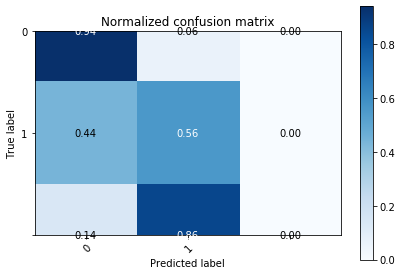

In [70]:
classificador = RandomForestClassifier(n_estimators=20
                                       , criterion="entropy"
                                       , max_depth=4
                                       , class_weight=None)

classificador.fit(x_train_filtrado, y_train)

y_pred = classificador.predict(x_test_filtrado)

print("Métrica 1 (Acurácia): {:.6}.\n".format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}\n".format(classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);